In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [26]:
df_I10= pd.read_csv('../datasets/Join_Collection_NSC2_BND_M20.csv')
df_I10.columns

Index(['Unnamed: 0', 'MDCARE_STRT_DT', 'BTH_YYYY', 'OFIJ_TYPE',
       'MCARE_SUBJ_CD', 'OPRTN_YN', 'ED_RC_TOT_AMT'],
      dtype='object')

In [27]:
df_I10_Goni = df_I10[['MDCARE_STRT_DT','MCARE_SUBJ_CD','ED_RC_TOT_AMT',]]
df_I10_Goni

,MDCARE_STRT_DT,MCARE_SUBJ_CD,ED_RC_TOT_AMT
0,20020710,1,7570
1,20020805,1,18160
2,20021017,1,7570
3,20071008,23,14200
4,20040312,1,7310
...,...,...,...
4624,20051220,1,9050
4625,20050614,1,9050
4626,20050716,1,9050
4627,20060123,1,9380


## 목표변수 검증 

Y : 연속형 : 단일 변수에 대한 정규성 여부 판단

    - 검증 갯수 따른 방법 선택 (레코드 갯수)
        - 5천개보다 이하 : shapiro normality test
        - 5천개보다 이상 : Anderson normality test

선정 변수: 입원기간
    
    - 분석 내용 : 진료를 받기 시작한 일자가 정규 분포를 따르는가?
        - 귀무가설 : 진료를 받기 시작한 일자는 정규 분포이다.
        - 대립가설 : 진료를 받기 시작한 일자는 정규 분포가 아니다.

    - 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
        - 통계 결론 : pvalue=0.0이므로 대립가설 참
        - 사실 결론 :  정규 분포가 아니다.
        ShapiroResult(statistic=0.9307956695556641, pvalue=5.97233405495237e-42)

In [28]:
df_I10_Goni.isnull().sum()

MDCARE_STRT_DT    0
MCARE_SUBJ_CD     0
ED_RC_TOT_AMT     0
dtype: int64

In [29]:
stats.shapiro(df_I10_Goni['MDCARE_STRT_DT'])

ShapiroResult(statistic=0.9307956695556641, pvalue=5.97233405495237e-42)

## 설명변수 검증
- 'MCARE_SUBJ_CD','ED_RC_TOT_AMT'

### X : 연속형 / Y : 연속형 : 주로 상관관계 확인에서 사용
    - correlation coefficient(상관계수)
    - 1 ~ 1
    - 0에 가까우면 관계없음, -1로 갈수록 반비례, 1로 갈수로 정비례

In [30]:
df_I10_Goni[['MDCARE_STRT_DT','ED_RC_TOT_AMT']].corr()

,MDCARE_STRT_DT,ED_RC_TOT_AMT
MDCARE_STRT_DT,1.000000,0.021376
ED_RC_TOT_AMT,0.021376,1.000000


#### 선정 변수: 'MDCARE_STRT_DT'(진료시작일), 'ED_RC_TOT_AMT'(총요양급여비용) 
- 분석 내용 : 진료를 받기 시작한 일자에 따라서 건강보험 총요양급여비용이 차이가 있나?
    - 귀무가설 : 시작일 따라서 비용차이가 없다.
    - 대립가설 : 시작일 따라서 비용차이가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 대립가설 참, 상관계수 관계 없음
    - 사실 결론 : 시작일에 따라서 비용차이가 있다. 
    (statistic=0.15384942352278172, pvalue=6.464904762600991e-26)
    
- PS : 사실 시작일과 치료기간에 따라서 건강보험 총요양급여비용이 차이가 있나?를 비교하려고 했는데 컬럼 이해를 잘못해서.. 되돌릴 수 없었다...

In [31]:
# 컬럼 중 하나라도 비정규 분포이면 사용
stats.spearmanr(df_I10_Goni['MDCARE_STRT_DT'], df_I10_Goni['ED_RC_TOT_AMT'])

SignificanceResult(statistic=0.15384942352278172, pvalue=6.464904762600991e-26)

### X : 범주형 / Y : 연속형 : 범주형 상관관계 확인. Wilcoxon TEST

#### 선정 변수: 'MDCARE_STRT_DT'(진료시작일),'MCARE_SUBJ_CD'(진료과목)

- 분석 내용 : 진료를 받기 시작한 일자에 따라서 실제 진료를 받은 진료과목이 차이가 있나?
    - 귀무가설 : 시작일 따라서 실제 진료를 받은 진료과목 차이가  없다.
    - 대립가설 : 시작일 따라서 실제 진료를 받은 진료과목 차이가 있다.
- 분석결론 (기준:p-value 0.05) / P.value < 0.05 : 대립 참
    - 통계 결론 : 대립가설 참, 상관계수 관계 없음
    - 사실 결론 : 시작일에 따라서 비용차이가 있다. 


<Axes: xlabel='MCARE_SUBJ_CD', ylabel='count'>

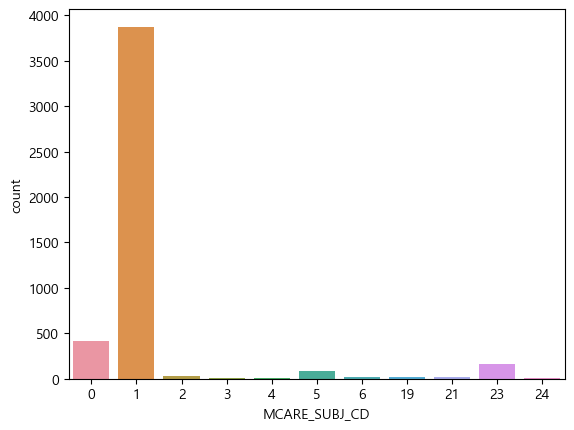

In [32]:
sns.countplot(data=df_I10_Goni, x='MCARE_SUBJ_CD')

In [33]:
df_I10_Goni['MCARE_SUBJ_CD'].value_counts()

1     3875
0      415
23     160
5       86
2       29
6       19
19      19
21      15
3        5
4        3
24       3
Name: MCARE_SUBJ_CD, dtype: int64

In [34]:
df_I10_Goni['MCARE_SUBJ_CD']=df_I10_Goni['MCARE_SUBJ_CD'].astype(object)

C:\Users\01-10\AppData\Local\Temp\ipykernel_16624\1640152481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_I10_Goni['MCARE_SUBJ_CD']=df_I10_Goni['MCARE_SUBJ_CD'].astype(object)


In [35]:
df_I10_Goni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MDCARE_STRT_DT  4629 non-null   int64 
 1   MCARE_SUBJ_CD   4629 non-null   object
 2   ED_RC_TOT_AMT   4629 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 108.6+ KB


In [36]:
channel_list = df_I10_Goni['MCARE_SUBJ_CD'].value_counts().index.to_list()
channel_list 

[1, 0, 23, 5, 2, 6, 19, 21, 3, 4, 24]

In [ ]:
df_result = []  # list()
for item in channel_list :
    condition = (df == item)
    df_result.append(df_channel4_amount[condition]) #list index에 DF으로 들어감
    

In [ ]:
stats.kruskal(df_I10_Goni[0]['MDCARE_STRT_DT'],df_result[1]['amount'],df_result[2]['amount'],df_result[3]['amount'])